In [1]:
from ROOT import TCanvas, TFile
from ROOT import TGraph, TGraphPolar
from ROOT import gStyle
from array import array
import math

c1 = TCanvas( 'c1', 'The Main Canvas', 200, 10, 1000, 800 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )
c1.Divide(1,1)

Welcome to JupyROOT 6.18/00


In [2]:
def fderiv(y,t,param,deriv):
    a = param[0]   
    deriv[0] = a*math.pow(math.sin(t),2)*y[0]

In [3]:
def yexact(t,param):
    return 2*param[0]*math.exp(0.5*(t - math.sin(t)*math.cos(t)))

In [4]:
def euler(y,nY,t,tau,deriv,param):
    F1 = array('d')
    
    for i in range(0,nY):
        F1.append(0.0)
    
    fderiv(y,t,param,F1)
    
    for i in range(0,nY):
        y[i] = y[i] + tau*F1[i]

In [5]:
def rk2(y,nY,t,tau,deriv,param):
    F1 = array('d')
    F2 = array('d')
    ytemp = array('d')
    
    for i in range(0,nY):
        F1.append(0.0)
        F2.append(0.0)
        ytemp.append(0.0)
    
    fderiv(y,t,param,F1)
    
    half_tau = 0.5*tau
    t_half = t + half_tau
    
    for i in range(0,nY):
        ytemp[i]=y[i]+half_tau*F1[i]
        
    fderiv(ytemp,t_half,param,F2)
        
    for i in range(0,nY):
        y[i] = y[i] + tau*F2[i]

In [6]:
def rk4(y,nY,t,tau,deriv,param):
    F1 = array('d')
    F2 = array('d')
    F3 = array('d')
    F4 = array('d')
    ytemp = array('d')
    
    for i in range(0,nY):
        F1.append(0.0)
        F2.append(0.0)
        F3.append(0.0)
        F4.append(0.0)
        ytemp.append(0.0)
        
    fderiv(y,t,param,F1)
    
    half_tau = 0.5*tau
    t_half = t + half_tau
    
    for i in range(0,nY):
        ytemp[i] = y[i] + half_tau*F1[i]
        
    fderiv(ytemp,t_half,param,F2)
    
    for i in range(0,nY):
        ytemp[i] = y[i] + half_tau*F2[i]
        
    fderiv(ytemp,t_half,param,F3)
    
    t_full = t + tau

    for i in range(0,nY):
        ytemp[i] = y[i] + tau*F3[i]
        
    fderiv(ytemp,t_full,param,F4)
    
    for i in range(0,nY):
        y[i] = y[i] + tau/6.0*(F1[i]+F4[i]+2.0*(F2[i]+F3[i]))

In [7]:
def rka(x,nX,t,tau,err,deriv,param):
    tSave = t
    safe1 = 0.9
    safe2 = 0.2
    
    xSmall = array('d')
    xBig = array('d')
    for i in range(0,nX):
        xSmall.append(0.0)
        xBig.append(0.0)
        
    maxTry = 100
    for iTry in range(0,maxTry):
        half_tau = 0.5*tau
        for i in range(0,nX):
            xSmall[i]=x[i]
        rk4(xSmall,nX,tSave,half_tau,deriv,param)
        t = tSave + half_tau
        rk4(xSmall,nX,t,half_tau,deriv,param)
        
        t = tSave + tau
        for i in range(0,nX):
            xBig[i] = x[i]
        rk4(xBig,nX,tSave,tau,deriv,param)
        
        errorRatio = 0.0
        eps = 1.0E-16
        for i in range(0,nX):
            scale = err * (math.fabs(xSmall[i]) + math.fabs(xBig[i]))/2.0
            xDiff = xSmall[i]-xBig[i]
            ratio = math.fabs(xDiff)/(scale+eps)
            if (errorRatio <= ratio):
                errorRatio = ratio
                
        tau_old = tau
        tau = safe1*tau_old*math.pow(errorRatio,-0.20)
        if (tau <= tau_old/safe2):
            tau = tau_old/safe2
        if (tau >= safe2/tau_old):
            tau = safe2/tau_old
            
        if (errorRatio < 1):
            for i in range(0,nX):
                x[i] = xSmall[i]
            return
        
    print("Error:  Adaptive Runge-Kutta Routine failed")

In [8]:
# Wikipedia page y' = (sin(t))^2*y

nStep = 26
tau = 0.2

# Everything below this point is calculated.
y0 = 2.0
yp0 = 0.0

param = array('d')
param.append(1.0)
adaptErr = 0.001

tlow = 0
thigh = tlow + (nStep-1)*tau
#print(tlow,thigh)
yy = array('d')
tt = array('d')
nexact = 1000
dt = (thigh-tlow)/nexact
for i in range(0,nexact+1):
    texact = tlow + i*dt
    yy.append(yexact(texact,param))
    tt.append(texact)
#print(yy,tt)

In [9]:
y1 = array('d')
y2 = array('d')
y3 = array('d')
y4 = array('d')
y5 = array('d')
y6 = array('d')
state1 = array('d')
state2 = array('d')
state3 = array('d')
state4 = array('d')
state5 = array('d')
state6 = array('d')
deriv1 = array('d')
deriv2 = array('d')
deriv3 = array('d')
deriv4 = array('d')
deriv5 = array('d')
deriv6 = array('d')

nState = 1

y1.append(y0)
y2.append(y0)
y3.append(y0)
y4.append(y0)
y5.append(y0)
y6.append(y0)

state1.append(y1[0])
state2.append(y2[0])
state3.append(y3[0])
state4.append(y4[0])
state5.append(y5[0])
state6.append(y6[0])

for i in range(0,nState):
    deriv1.append(yp0)
    deriv2.append(yp0)
    deriv3.append(yp0)
    deriv3.append(yp0)
    deriv5.append(yp0)
    deriv6.append(yp0)

In [10]:
yplot1 = array('d')
yplot2 = array('d')
yplot3 = array('d')
yplot4 = array('d')
yplot5 = array('d')
yplot6 = array('d')
tplot1 = array('d')
tplot2 = array('d')
tplot3 = array('d')
tplot4 = array('d')
tplot5 = array('d')
tplot6 = array('d')

In [11]:
for method in range(1,7):
    time = 0.0
    for iStep in range(0,nStep):
        
        if (method == 1):
            yplot1.append(y1[0])
            tplot1.append(time)
            euler(state1,nState,time,tau,deriv1,param)
            y1[0] = state1[0]
            time = time + tau
        else:
            if (method == 2):
                yplot2.append(y2[0])
                tplot2.append(time)
                euler(state2,nState,time,tau/2.0,deriv2,param)
                y2[0] = state2[0]
                time = time + tau/2.0
                yplot2.append(y2[0])
                tplot2.append(time)
                euler(state2,nState,time,tau/2.0,deriv2,param)
                y2[0] = state2[0]
                time = time + tau/2.0
            else:
                if (method == 3):
                    yplot3.append(y3[0])
                    tplot3.append(time)
                    rk4(state3,nState,time,tau,deriv3,param)
                    y3[0]=state3[0]
                    time = time + tau
                else:
                    if (method == 4):
                        yplot4.append(y4[0])
                        tplot4.append(time)
                        rka(state4,nState,time,tau,adaptErr,deriv4,param)
                        y4[0]=state4[0]
                        #print ('here ',iStep,time,y4[0],deriv4[0])
                        time = time + tau
                    else:
                        if (method == 5):
                            yplot5.append(y5[0])
                            tplot5.append(time)
                            rk2(state5,nState,time,tau,deriv5,param)
                            y5[0]=state5[0]
                            time = time + tau    
                        else:
                            if (method == 6):
                                yplot6.append(y6[0])
                                tplot6.append(time)
                                euler(state6,nState,time,tau/4.0,deriv6,param)
                                y6[0] = state6[0]
                                time = time + tau/4.0
                                yplot6.append(y6[0])
                                tplot6.append(time)
                                euler(state6,nState,time,tau/4.0,deriv6,param)
                                y6[0] = state6[0]
                                time = time + tau/4.0
                                yplot6.append(y6[0])
                                tplot6.append(time)
                                euler(state6,nState,time,tau/4.0,deriv6,param)
                                y6[0] = state6[0]
                                time = time + tau/4.0
                                yplot6.append(y6[0])
                                tplot6.append(time)
                                euler(state6,nState,time,tau/4.0,deriv6,param)
                                y6[0] = state6[0]
                                time = time + tau/4.0

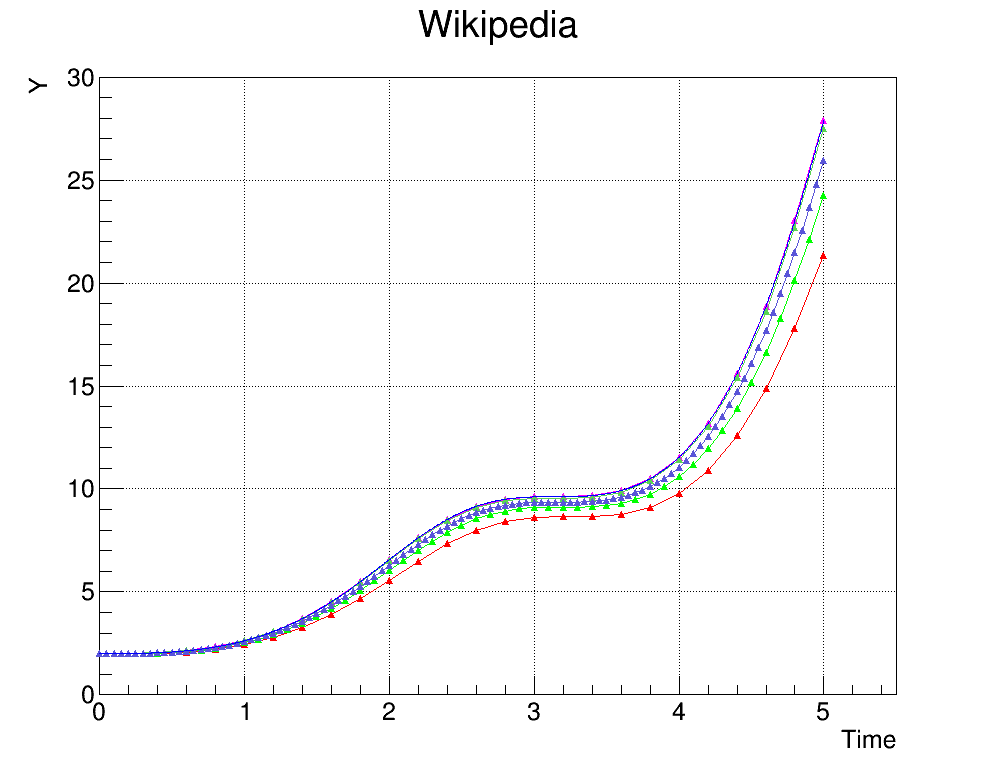

In [12]:
gStyle.SetOptFit(1)
c1.Draw()

gre = TGraph(nStep,tplot1,yplot1)
gret = TGraph(2*nStep-1,tplot2,yplot2)
grrk4 = TGraph(nStep,tplot3,yplot3)
grrka = TGraph(nStep,tplot4,yplot4)
grrk2 = TGraph(nStep,tplot5,yplot5)
gret4 = TGraph(4*nStep-3,tplot6,yplot6)

gre.SetMarkerColor(2)
gret.SetMarkerColor(3)
grrk4.SetMarkerColor(4)
grrka.SetMarkerColor(6)
grrk2.SetMarkerColor(8)
gret4.SetMarkerColor(9)

gre.SetLineColor(2)
gret.SetLineColor(3)
grrk4.SetLineColor(4)
grrka.SetLineColor(6)
grrk2.SetLineColor(8)
gret4.SetLineColor(9)

grexact = TGraph(nexact+1,tt,yy)
grexact.SetLineColor(4)

c1.cd()
gre.GetHistogram().SetMaximum(30.0)
gre.GetHistogram().SetMinimum(0.0)
gre.SetMarkerStyle(22)
gret.SetMarkerStyle(22)
grrk4.SetMarkerStyle(22)
grrka.SetMarkerStyle(22)
grrk2.SetMarkerStyle(22)
gret4.SetMarkerStyle(22)

gre.SetTitle("Wikipedia")
gre.GetXaxis().SetTitle("Time")
gre.GetYaxis().SetTitle("Y")
gre.Draw("APL")
gret.Draw("PL")
grrk4.Draw("PL")
grrka.Draw("PL")
grrk2.Draw("PL")
gret4.Draw("PL")

grexact.Draw("L")
c1.Draw()